<a href="https://colab.research.google.com/github/KryserY/NLP/blob/main/TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF-IDF

# PyTorch

[PyTorch](https://pytorch.org/) is an open source machine learning library used for applications such as natural language processing and computer vision. It is based on the [Torch](http://torch.ch/) library.

Before we use Pytorch it is neccessary to understand what Pytorch is. Let's start from the core concepts: **Tensor**, **(Computational) Graph** and **Automatic Differentiation**


## Tensor
A tensor is a generalization of vectors and matrices. Vectors are one dimensional. Matrices are two dimensional. Tensors can have any number of dimensions. Tensors are the primary data structure used by neural networks. Normally, we refer to **nd**-tensors where **nd** stands for **n** **dimensional**.

There are three basic attributes we need to know about tensors:
*   *Rank*: The number of dimensions present within the tensor. e.g. rank-2 tensor means 2d-tensor.
*   *Axes*: Used to refer to a specific dimension. The number of axes is equal to the number of dimensions. The length of an axis represents the number of elements on that axis. 
*   *Shape*: Formed by the length of each axis. e.g. shape(1,2) means a 2d-tensor with the first axis of length 1 and the second axis of length 2. 


![Tensor_Rank](https://drive.google.com/uc?id=1o5wulLHGxUuPxH3t3xfV8U7d2CrsL1oG)


In PyTorch, tensors are represented by an object called [torch.Tensor](https://pytorch.org/docs/stable/tensors.html). This object has the following key properties : 
*   *torch.dtype*: an object representing the data type of a torch.Tensor. e.g. torch.float32
*   *torch.device*: an object representing the device on which a torch.Tensor is or will be allocated. e.g. CPU or CUDA (GPU)
*   *torch.layout*: an object representing the memory layout of a torch.Tensor.

More details with illustrative examples can be found [here](https://pytorch.org/docs/stable/tensor_attributes.html#tensor-attributes-doc) 




## Computational Graph and Automatic Differentiation
PyTorch uses (directed acyclic) computational graphs  to graph the functional operations that are applied to tensors inside neural networks so as to computationally calculate derivatives for the network optimization. In graphs, the nodes are Tensors while the edges are functions that produce output Tensors from input Tensors (e.g. summation, mutiplication). Those graphs enable PyTorch to do the automatic differentiation for us, i.e. it can automatically calculate the derivatives that are needed for network optimization. We will learn more about it through pratical examples in following sections.

Specifically, PyTorch generates the computational graph on the fly as when operations are created during forward passes in neural networks, which is refered to as a dynamic computational graph. Historically, this was one of the main differences between PyTorch and TensorFlow (which used static computational graphs, but now has an eager mode that functions more like PyTorch).



## Importing the PyTorch library
[Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb) has the torch library installed by default so you just need to import it as shown below:

In [ ]:
import torch
print(torch.__version__) #check version

1.13.1+cu116


## Tensor creation
We will be implementing lots of models in PyTorch during the course. To get started, let's  have a look at how to create a tensor.

We can create tensors **with numerical data**, typically numpy arrays:

In [ ]:
import numpy as np

# Scalar (0 Rank)
data = torch.tensor(1)
print(data.shape)


# Vector (1 Rank)
data = np.array([1,2]) 
data = torch.Tensor(data)
print(data.shape)


# Matrix (2 Rank)
data = np.ones((2,2,)) 
data = torch.Tensor(data)
print(data.shape)


# Cube (3 Rank)
data = np.ones((2,2,2)) 
data = torch.Tensor(data)
print(data.shape)


# Vector of cubes (4 Rank)
data = np.ones((2,2,2,2)) 
data = torch.Tensor(data)
print(data.shape)

torch.Size([])
torch.Size([2])
torch.Size([2, 2])
torch.Size([2, 2, 2])
torch.Size([2, 2, 2, 2])


Notice that although both torch.Tensor() and torch.tensor() can be used to  generate tensors, there are some differences:

*   torch.Tensor() is the constructor of the torch.Tensor class while torch.tensor() is a factory function that constructs torch.Tensor objects and return them to the caller 
*   torch.Tensor() can return an empty tensor without specifying incoming data while torch.tensor() with no input data will prouduce a TypeError
*   torch.Tensor() uses the default dtype "float32" while torch.tensor() chooses the dtype based on the incoming data (type inference). This is illustrated by the following example:



In [ ]:
data = np.array([1,2]) 
print("NumPy Data type:", data.dtype)

data_T = torch.Tensor(data)
print("torch.Tensor():")
print("Object:", data_T)
print("Data type:", data_T.dtype)
print()

data_t = torch.tensor(data)
print("torch.tensor():")
print("Object:", data_t)
print("Data type", data_t.dtype)
print()

#we can also specify a datatype with torch.tensor()
data_t = torch.tensor(data, dtype=torch.float64)
print("torch.tensor() with specified type:")
print("Object:", data_t)
print("Data type", data_t.dtype)
print()

# We can also check and set the default type
print("Default type?", torch.get_default_dtype())
# Note, the default can be set with 'torch.set_default_dtype(dtype)'

NumPy Data type: int64
torch.Tensor():
Object: tensor([1., 2.])
Data type: torch.float32

torch.tensor():
Object: tensor([1, 2])
Data type torch.int64

torch.tensor() with specified type:
Object: tensor([1., 2.], dtype=torch.float64)
Data type torch.float64

Default type? torch.float32


As well as torch.Tensor() and torch.tensor(), we can also use torch.as_tensor and torch.from_numpy

In [ ]:
# Create tensor using torch.as_tensor 
np_data = np.ones((2,2,2)) 
data = torch.as_tensor(np_data)
print("Data:", np_data)
print("torch.as_tensor:")
print("Object:", data)
print("Data type:", data.dtype)
print("Data shape:", data.shape)
print()

# Create tensor using torch.from_numpy
np_data = np.ones((2,2,2,2))
data = torch.from_numpy(np_data)
print("Data:", np_data)
print("torch.from_numpy:")
print("Object:", data)
print("Data type:", data.dtype)
print("Data shape:", data.shape)

Data: [[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]
torch.as_tensor:
Object: tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]], dtype=torch.float64)
Data type: torch.float64
Data shape: torch.Size([2, 2, 2])

Data: [[[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]


 [[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]]
torch.from_numpy:
Object: tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]], dtype=torch.float64)
Data type: torch.float64
Data shape: torch.Size([2, 2, 2, 2])


Alternatively, we can also create tensors **without data** using factory functions

In [ ]:
# torch.eye: Returns an identity matrix of the specified size
torch.eye(2)

tensor([[1., 0.],
        [0., 1.]])

In [ ]:
# torch.zeros: Returns a tensor of given shape filled with all zeros
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
# torch.ones: Returns a tensor of given shape filled with all ones
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
# torch.rand: Returns a tensor of given shape filled with values drawn from a uniform distribution on [0, 1).
torch.rand(2,2)

tensor([[0.3388, 0.8704],
        [0.9157, 0.3807]])

More factory functions for tensor creation can be found [here](https://pytorch.org/cppdocs/notes/tensor_creation.html#factory-functions)

## Basic tensor operations

The list of operations with examples can be found [here](https://pytorch.org/docs/stable/torch.html#math-operations). Please go through and try to practise yourself with examples before you move on. You don't need to remember all of them, you can easily refer back to the list when needed.

## Simple Linear Regression

![Linear_Regression](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/320px-Linear_regression.svg.png)

The following code implements a simple linear regression algorithm.



### Linear Regression from scratch

Prepare data

In [ ]:
import numpy
import matplotlib.pyplot as plt
import torch

# training data
x_training = numpy.asarray([1,2,5,8,9,12,14,16,18,20])
y_training = numpy.asarray([1500,3500,7200,11000,12500,18500,22000,24500,28000,30500])

x_test = numpy.asarray([3,7,13,15,19])
y_test = numpy.asarray([4400,10000,19500,23500,29000])

# creating tensors for training data and test data
x_data = torch.from_numpy(x_training)
y_data = torch.from_numpy(y_training)
x_test_data = torch.from_numpy(x_test)
y_test_data = torch.from_numpy(y_test)


Once the dataset is prepared, we can start defining our model architecture
 
Let's first build it from scratch to gain a clear understanding of how automatic differentiation works:



In [ ]:
# Define weights and biases
weight = torch.tensor(numpy.random.randn(), requires_grad=True)
bias = torch.tensor(numpy.random.randn(), requires_grad=True)
print(weight)
print(bias)

tensor(-0.3071, requires_grad=True)
tensor(-1.0070, requires_grad=True)


Note that we set 'requires_grad=True' above, which turns on the automatic gradient computation these two objects.

Every Tensor has a flag: 'requires_grad' that allows for fine grained exclusion of subgraphs from gradient computation and can increase efficiency. If any input to an operation requires a gradient, its output will also require a gradient. Conversely, the output won’t require a gradient only if all inputs don’t require gradients. Backward computation is not performed in the subgraphs where all Tensors don’t require gradients.

In [ ]:
# Define the model
# Hypothesis = W * X + b (Linear Model)
def linearRegression(x):
  return x * weight + bias

In [ ]:
# Generate predictions and compare with ground truth labels
# As we can see, because we randomly initialised the weight and bias, the model is not accurate
predictions = linearRegression(x_data)
print(predictions)
print(y_data)

tensor([-1.3142, -1.6213, -2.5427, -3.4640, -3.7712, -4.6925, -5.3068, -5.9210,
        -6.5353, -7.1495], grad_fn=<AddBackward0>)
tensor([ 1500,  3500,  7200, 11000, 12500, 18500, 22000, 24500, 28000, 30500])


In [ ]:
# Define loss function 
# here we use mean squared error (MSE)
def mse(x1, x2):
  diff = x1 - x2
  return torch.sum(diff*diff)/diff.numel()

In [ ]:
# Compute loss - lower is better
loss = mse(predictions, y_data)
print(loss)

tensor(3.4861e+08, grad_fn=<DivBackward0>)


PyTorch automatically computed the gradient/derivative of the loss. In this case, the derivative is calculated with regard to the weight and bias because we set them to have 'requires_grad=True' and they are part of the graph with the loss.

All we need to do now is to call the backward() function over our loss, which will trigger the automatic computation of gradients based on the chain rule.

In [ ]:
# Compute gradients
loss.backward()

After the backward pass, the gradients are stored in the .grad property of the tensors involved:

In [ ]:
# Gradient for weight
print("Current weight:", weight)
print("Weight gradient:", weight.grad)
print()

# Gradient for bias
print("Current bias:", bias)
print("Bias gradient:", bias.grad)

Current weight: tensor(-0.3071, requires_grad=True)
Weight gradient: tensor(-456313.)

Current bias: tensor(-1.0070, requires_grad=True)
Bias gradient: tensor(-31848.4648)


Now we can adjust the weight and bias using the gradients. Why would we do that? Because it reduces the error for the example we used to compute the gradient. 

In [ ]:
# This 'with' block means there will be no automatic gradient computation
# We do this because we do not want gradients to be calculated for this operation
with torch.no_grad(): 
  # We use learning rate of 1e-5 here (ie., that is how big a change we make)
  weight -= weight.grad * 1e-5
  bias -= bias.grad * 1e-5
print(weight)
print(bias)


tensor(4.2560, requires_grad=True)
tensor(-0.6885, requires_grad=True)


We need to reset the gradients before the next forward pass, because PyTorch accumulates gradients.

In [ ]:
with torch.no_grad(): 
  weight.grad.zero_()
  bias.grad.zero_()  
print(weight.grad)
print(bias.grad)

tensor(0.)
tensor(0.)


Let's predict and compute loss again. The loss should be lower with the new weights and biases.

In [ ]:
predictions = linearRegression(x_data)
loss = mse(predictions, y_data)
print(loss)

tensor(3.4652e+08, grad_fn=<DivBackward0>)


Hopefully you now have an initial understanding of how automatic gradient computation works.

Let's start training the model for multiple epochs (each epoch is one pass through the data).

We do this with a python loop.

Epoch: 0000 loss= 344440320.00000000 W= 8.8054 b= -0.3710
Epoch: 0200 loss= 103661976.00000000 W= 691.4285 b= 47.1439
Epoch: 0400 loss= 31410054.00000000 W= 1065.3802 b= 72.9420
Epoch: 0600 loss= 9728885.00000000 W= 1270.2443 b= 86.8443
Epoch: 0800 loss= 3222824.75000000 W= 1382.4825 b= 94.2302
Epoch: 1000 loss= 1270410.62500000 W= 1443.9819 b= 98.0469
Epoch: 1200 loss= 684431.12500000 W= 1477.6877 b= 99.9084
Epoch: 1400 loss= 508505.00000000 W= 1496.1674 b= 100.6994
Epoch: 1600 loss= 455626.06250000 W= 1506.3058 b= 100.9040
Epoch: 1800 loss= 439666.43750000 W= 1511.8762 b= 100.7878
Epoch: 2000 loss= 434787.00000000 W= 1514.9438 b= 100.4959
Epoch: 2200 loss= 433234.09375000 W= 1516.6401 b= 100.1082
Epoch: 2400 loss= 432678.06250000 W= 1517.5856 b= 99.6681
Epoch: 2600 loss= 432422.06250000 W= 1518.1194 b= 99.1995
Epoch: 2800 loss= 432256.84375000 W= 1518.4279 b= 98.7157
Epoch: 3000 loss= 432118.50000000 W= 1518.6121 b= 98.2236
Epoch: 3200 loss= 431988.25000000 W= 1518.7288 b= 97.7273
Ep

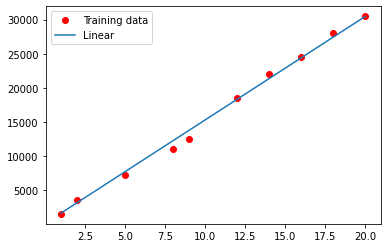

Testing loss= 218904.921875000
Absolute mean square loss difference: 211954.328125000


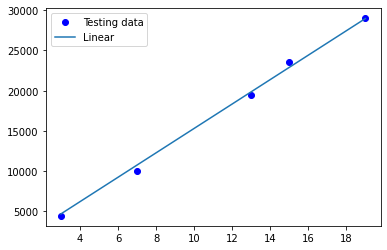

In [ ]:
# An epoch is one iteration over the entire input data
no_of_epochs = 5000
# How often you want to display training info.
display_interval = 200

for epoch in range(no_of_epochs):
  predictions = linearRegression(x_data)
  loss = mse(predictions, y_data)
  loss.backward()
  with torch.no_grad():
    weight -= weight.grad * 1e-5
    bias -= bias.grad * 1e-5
    weight.grad.zero_()
    bias.grad.zero_()
  if epoch % display_interval == 0 :
      # calculate the cost of the current model
      predictions = linearRegression(x_data)
      loss = mse(predictions, y_data)           
      print("Epoch:", '%04d' %(epoch), "loss=", "{:.8f}".format(loss), "W=", "{:.4f}".format(weight), "b=",  "{:.4f}".format(bias))

print("=========================================================")
training_loss = mse(linearRegression(x_data), y_data)   
print("Optimised:", "loss=", "{:.9f}".format(training_loss.data), \
              "W=", "{:.9f}".format(weight.data), "b=", "{:.9f}".format(bias.data))
    
# Plot training data on a graph
plt.plot(x_training, y_training, 'ro', label='Training data')
plt.plot(x_training, weight.data * x_training + bias.data, label='Linear')
plt.legend()
plt.show()

# Calculate test loss
testing_loss = mse(linearRegression(x_test_data), y_test_data) 
print("Testing loss=", "{:.9f}".format(testing_loss.data))
print("Absolute mean square loss difference:", "{:.9f}".format(abs(
      training_loss.data - testing_loss.data)))
  
# Plot test data on a graph
plt.plot(x_test, y_test, 'bo', label='Testing data')
plt.plot(x_test, weight.data * x_test + bias.data, label='Linear')
plt.legend()
plt.show()

### Linear Regression using PyTorch built-ins

Now we will walk through creating a linear model using a built-in Pytorch class rather than defining our own function and tensors.

Prepare some random data

In [ ]:
import numpy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# training data: this time we use 2d array
# Assuming we have 90 samples of 10 features about a house condition, such as
# bedroom number, distance to city center etc. and will predict the house price 
x_data = torch.randn(90, 10)
y_data = torch.randn(90, 1)

# dev data:
x_dev_data = torch.randn(10, 10)
y_dev_data = torch.randn(10, 1)

# test data:
x_test_data = torch.randn(10, 10)
y_test_data = torch.randn(10, 1)



This time we don't need to initialize the weight and bias manually. Instead, we will define the model using the built-in [torch.nn.Linear](https://pytorch.org/docs/stable/nn.html#linear).

[**torch.nn**](https://pytorch.org/docs/stable/nn.html) is a subpackage that contains modules and extensible classes for us to build neural networks.



In [ ]:
# Define model
linearRegression =  nn.Linear(10,1)
print(linearRegression.weight)
print(linearRegression.bias)

Parameter containing:
tensor([[-0.0984,  0.0548, -0.0998,  0.2443,  0.0548,  0.1346,  0.0940,  0.0825,
          0.0360, -0.1208]], requires_grad=True)
Parameter containing:
tensor([0.0923], requires_grad=True)


Similarly, we don't manually update the weight and bias using gradients by ourselves. Instead, we will use the optimizer optim.SGD.

[**torch.optim**](https://pytorch.org/docs/stable/optim.html) is a subpackage that contains the standard optimization operations like Adam and SGD.



In [ ]:
# Define optimizer
# Just pass the model parameters to be updated and specify the learning rate when calling optim.SGD
# In PyTorch, 'SGD' uses Mini-batch Gradient Descent with momentum (not the simplest SGD).
# In this case, we set the mini-batch size to be the size of our data,
# so it is actually Batch Gradient Descent with momentum.
optimizer = torch.optim.SGD(linearRegression.parameters(), lr=1e-5)

Again, we use the built-in loss function mse_loss instead of defining it manually.

We will need the [**torch.nn.functional**](https://pytorch.org/docs/stable/nn.functional.html) interface, which contains common operations for building neural networks, e.g., convolution operations, activation functions, and loss functions.

In [ ]:
# Import nn.functional 
import torch.nn.functional as F

# Define the loss function
loss_func = F.mse_loss

# Calculate loss
loss = loss_func(linearRegression(x_data), y_data)
print(loss)

tensor(0.9346, grad_fn=<MseLossBackward0>)


Now we are ready to run a loop to train the model:

In [ ]:
# An epoch is one iteration over the entire input data
no_of_epochs = 5000
# How often you want to display training info.
display_interval = 200

for epoch in range(no_of_epochs):
  predictions = linearRegression(x_data)
  loss = loss_func(predictions, y_data)
  loss.backward()
  optimizer.step() #call step() to automatically update the parameters through our defined optimizer, which can be called once after backward()
  optimizer.zero_grad() #reset the gradient as what we did before
  if epoch % display_interval == 0 :
      # calculate the loss of the current model
      predictions = linearRegression(x_dev_data)
      loss = loss_func(predictions, y_dev_data)          
      print("Epoch:", '%04d' % (epoch), "dev loss=", "{:.8f}".format(loss))

print("=========================================================")
training_loss = mse(linearRegression(x_data), y_data)   
print("Optimised:", "training loss=", "{:.9f}".format(training_loss.data))
training_loss = mse(linearRegression(x_dev_data), y_dev_data)   
print("Optimised:", "dev loss=", "{:.9f}".format(training_loss.data))
print("=========================================================")

# Calculate testing loss
testing_loss = loss_func(linearRegression(x_test_data), y_test_data) 
print("Testing loss=", "{:.9f}".format(testing_loss.data))
print("Absolute mean square loss difference:", "{:.9f}".format(abs(
      training_loss.data - testing_loss.data)))

Epoch: 0000 dev loss= 0.71956939
Epoch: 0200 dev loss= 0.71920079
Epoch: 0400 dev loss= 0.71883750
Epoch: 0600 dev loss= 0.71848023
Epoch: 0800 dev loss= 0.71812856
Epoch: 1000 dev loss= 0.71778238
Epoch: 1200 dev loss= 0.71744186
Epoch: 1400 dev loss= 0.71710640
Epoch: 1600 dev loss= 0.71677643
Epoch: 1800 dev loss= 0.71645176
Epoch: 2000 dev loss= 0.71613252
Epoch: 2200 dev loss= 0.71581858
Epoch: 2400 dev loss= 0.71550983
Epoch: 2600 dev loss= 0.71520627
Epoch: 2800 dev loss= 0.71490753
Epoch: 3000 dev loss= 0.71461397
Epoch: 3200 dev loss= 0.71432531
Epoch: 3400 dev loss= 0.71404189
Epoch: 3600 dev loss= 0.71376342
Epoch: 3800 dev loss= 0.71348965
Epoch: 4000 dev loss= 0.71322078
Epoch: 4200 dev loss= 0.71295649
Epoch: 4400 dev loss= 0.71269727
Epoch: 4600 dev loss= 0.71244258
Epoch: 4800 dev loss= 0.71219289
Optimised: training loss= 1.079798937
Optimised: dev loss= 0.711948812
Testing loss= 0.977692723
Absolute mean square loss difference: 0.265743911


# NLTK Library and WordNet

WordNet® is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of  synonyms (synsets), each expressing a distinct concept.

In Python, **[NLTK](https://www.nltk.org/)** (**N**atural **L**anguage **T**ool**k**it) includes English WordNet. NLTK is an excellent educational resource. It has many convenient modules for NLP tasks, and is well documented. However, most of its componenets are far from state-of-the-art in accuracy and speed.

**To use wordnet, you need to download the wordnet data via the NLTK library**

In [ ]:
import nltk

## WordNet

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet as wn

Let's get a set of synonyms that share a common meaning.

Note that we specify particular sesnes/meanings of each word here (the '01').

In [ ]:
dog = wn.synset('dog.n.01')
person = wn.synset('person.n.01')
cat = wn.synset('cat.n.01')
computer = wn.synset('computer.n.01')

### path_similarity()
path_similarity() returns a score denoting how similar two word senses are, based on the shortest path that connects the senses in the is-a (hypernym/hypnoym) taxonomy. The score is in the range 0 to 1.

In [ ]:
print("dog<->cat : ", wn.path_similarity(dog,cat))
print("person<->cat : ", wn.path_similarity(person,cat))
print("person<->dog : ", wn.path_similarity(person,dog))
print("person<->computer : ", wn.path_similarity(person,computer))

dog<->cat :  0.2
person<->cat :  0.1
person<->dog :  0.2
person<->computer :  0.1111111111111111


### Wu-Palmer Similarity (wup_similarity() )
wup_similarity() returns a score denoting how similar two word senses are, based on the depth of the two senses in the taxonomy and that of their Least Common Subsumer / Lowest Common Ancestor (ie., the most specific word that is an ancestor of both words).

In [ ]:
print("dog<->cat : ", wn.wup_similarity(dog,cat))
print("person<->cat : ", wn.wup_similarity(person,cat))
print("person<->dog : ", wn.wup_similarity(person,dog))
print("person<->computer : ", wn.wup_similarity(person,computer))

dog<->cat :  0.8571428571428571
person<->cat :  0.5714285714285714
person<->dog :  0.75
person<->computer :  0.5


# TFIDF (Term Frequency Inverse Document Frequency)

TFIDF is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.


**Tokenization**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

import re
import numpy as np

nltk.download('stopwords')
from nltk.corpus import stopwords as sw

corpus = [
    'Jonathan loves  NLP. NLP teaches Jonathan', #document 1
    'Jonathan teaches NLP' #document 2
]

# Tokenize sentences - for only doc1
tokenized_sentence = sent_tokenize(corpus[0])
print("\ntokenized_sentence: ")
print(tokenized_sentence)

# Remove punctuations - for only doc1
punc_free_doc1 = re.sub(r'[^\w\s]','',corpus[0])
print("\npunc_free_sentence: ")
print(punc_free_doc1)

# Tokenize words - for only doc1
tokenized_doc1 = word_tokenize(punc_free_doc1)
print("\ntokenized_word: ")
print(tokenized_doc1)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokenized_doc1]
print("\nlower_case: ")
print(lower_tokens)

# stop word removal 
sww = sw.words()
tokenized_doc1 = [w for w in lower_tokens if not w in sww]
print("\ntokenized_word (in lower case, w/o stopwords): ")
print(tokenized_doc1)

# same process for doc2
punc_free_doc2 = re.sub(r'[^\w\s]','',corpus[1])
tokenized_doc2 = word_tokenize(punc_free_doc2)
lower_tokens2 = [t.lower() for t in tokenized_doc2]
tokenized_doc2 = [w for w in lower_tokens2 if not w in sww]

tokenized_docs = [tokenized_doc1, tokenized_doc2]
print("\nfinal_docs: ")
print(tokenized_docs[0])
print(tokenized_docs[1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



tokenized_sentence: 
['Jonathan loves  NLP.', 'NLP teaches Jonathan']

punc_free_sentence: 
Jonathan loves  NLP NLP teaches Jonathan

tokenized_word: 
['Jonathan', 'loves', 'NLP', 'NLP', 'teaches', 'Jonathan']

lower_case: 
['jonathan', 'loves', 'nlp', 'nlp', 'teaches', 'jonathan']

tokenized_word (in lower case, w/o stopwords): 
['jonathan', 'loves', 'nlp', 'nlp', 'teaches', 'jonathan']

final_docs: 
['jonathan', 'loves', 'nlp', 'nlp', 'teaches', 'jonathan']
['jonathan', 'teaches', 'nlp']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Document Frequency (DF)**

N is the number of documents in the collection.

DF is how many documents in the collection contain a specific word.

*df(t) = occurrence of t in documents*

*idf(t) = log(N/(df + 1))*



In [ ]:
DF = {}

for tokenized_doc in tokenized_docs:
  # get each unique word in the doc - and count the number of occurrences in the document
  for term in np.unique(tokenized_doc):
    if term in DF:
      DF[term] += 1
    else:
      DF[term] = 1

DF

{'jonathan': 2, 'loves': 1, 'nlp': 2, 'teaches': 2}

In [ ]:
DF['jonathan']

2

**TF-IDF calculation**

In the following sample code, we will use [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) to count how often each word occurs in a document. [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) is a Python class that enables counting for elements from an iterable.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import math

tf_idf = {}

# total number of documents
N = len(tokenized_docs) 

doc_id = 0
# get each tokenised doc
for tokenized_doc in tokenized_docs:
    # initialise counter for the doc
    counter = Counter(tokenized_doc)
    # calculate the total number of words in the doc
    total_num_words = len(tokenized_doc)    

    # get each unique word in the doc
    for term in np.unique(tokenized_doc): 

        # calculate Term Frequency 
        tf = counter[term]/total_num_words
        
        # get the Document Frequency
        df = DF[term]

        # calculate Inverse Document Frequency with smoothing (the +1)
        idf = math.log(N/(df+1))+1

        # calculate TF-IDF
        tf_idf[doc_id, term] = tf*idf

    doc_id += 1 

tf_idf

{(0, 'jonathan'): 0.19817829729727854,
 (0, 'loves'): 0.16666666666666666,
 (0, 'nlp'): 0.19817829729727854,
 (0, 'teaches'): 0.09908914864863927,
 (1, 'jonathan'): 0.19817829729727854,
 (1, 'nlp'): 0.19817829729727854,
 (1, 'teaches'): 0.19817829729727854}

**Sort by the importance - Descending Order**

Use the Python built-in function [sorted](https://docs.python.org/3/howto/sorting.html) to sort the words based on their tf_idf values.

In [ ]:
import numpy as np
#sort the dictionary based on values
dict_exmaple = tf_idf
sorted_dict = sorted(dict_exmaple.items(), key=lambda x: x[1], reverse=True) 
sorted_dict

[((0, 'jonathan'), 0.19817829729727854),
 ((0, 'nlp'), 0.19817829729727854),
 ((1, 'jonathan'), 0.19817829729727854),
 ((1, 'nlp'), 0.19817829729727854),
 ((1, 'teaches'), 0.19817829729727854),
 ((0, 'loves'), 0.16666666666666666),
 ((0, 'teaches'), 0.09908914864863927)]

# Exercise
Please complete the following **two questions** E1 and E2. **You should submit an "ipynb" file to Canvas**  (When you have completed your answer here you can download it using "File" > "Download .ipynb").

##E1. What is the main limitations of using a one-hot encoding? (Full Mark: 1 mark. There is no partial mark.) 
In order to receive full marks, please write down your answer below with **a supportive example**, using your own words.

In [ ]:
#Lab01 - E1

Answer = "One -hot encoding cannot represent the similarity between two words such as synonym.  Moreover, for a document with a large amount of words, one-hot encoding may make use of vectors with very high dimensions, which might induce low calculation efficiency" #@param {type:"raw"}

## E2. Calculate TF-IDF and search the Wiki page. (Full Mark: 1 mark. There is no partial mark.)
- You need to complete the following 'Exercise Requirement'

In this exercise, we will practise calculating TF-IDF using documents from [wikipedia library](https://pypi.org/project/wikipedia/), a Python library that makes it easy to access and parse data from Wikipedia. Based on the calculated TF-IDF values, we then search the Wiki page for the word that has the highest TF-IDF value.

In [ ]:
## Install and import the wikipedia library
!pip install wikipedia
import wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=1affa2cd9540d8d04f1b3118a5b83912e83539973409fac97b2dd2dbddf5d6e5
  Stored in directory: /root/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [ ]:
# Let's collect the page content from the following city related wiki pages as documents
# by using wikipedia.page(city).content, which returns a list of city related documents 
cities_docs = ["Sydney","Melbourne","Brisbane"]
documents = [wikipedia.page(city).content for city in cities_docs]

# Let's see a sample of the documents (pages) we got
# We'll use a convenient library for printing with wordwrap
import textwrap
for doc in documents:
  sample = doc[:400]
  print("\n".join(textwrap.wrap(sample)))
  print()

Sydney ( (listen) SID-nee) is the capital city of the state of New
South Wales, and the most populous city in both Australia and Oceania.
Located on Australia's east coast, the metropolis surrounds Sydney
Harbour and extends about 70 km (43.5 mi) towards the Blue Mountains
to the west, Hawkesbury to the north, the Royal National Park to the
south and Macarthur to the south-west. Sydney is made up

Melbourne ( (listen) MEL-bərn; Boonwurrung/Woiwurrung: Narrm or Naarm)
is the capital and most populous city of the Australian state of
Victoria, and the second-most populous city in both Australia and
Oceania. Its name generally refers to a 9,993 km2 (3,858 sq mi)
metropolitan area known as Greater Melbourne, comprising an urban
agglomeration of 31 local municipalities, although the name is also

Brisbane ( (listen) BRIZ-bən) is the capital and most populous city of
Queensland, and the third-most populous city in Australia and Oceania
with a population of approximately 2.6 million. Brisbane 

***Among those three wiki page contents we retrieved, what do you think are the most important words?***

### Exercise Requirement

Below are comments outlining the structure of the exercise. Please fill in the following function(s): 

First, pass the (list of) documents provided above into the `tfidf_wikisearch` function as input. In the function, you may:
  
*   process the documents provided in the sample code above (e.g. tokenise them). **Please add three additional stop words: sydney, melbourne and brisbane.**
*   calculate the TF-IDF values for each unique word ([Counter](https://docs.python.org/3/library/collections.html#collections.Counter) is useful here).
*   sort the words based on the TF-IDF values and get the word with the highest TF-IDF value. (The Python built-in function [sorted](https://docs.python.org/3/howto/sorting.html) might be helpful)
*   search the wiki page for this word and print out the page content (See above for how we search and retrieve the wiki page content for the city documents) 

In your final submission, the **print log should be kept in the cell execution output field**. You should **submit an "ipynb" file to Canvas** (You can download it using "File" > "Download .ipynb"). 

Note that the marker will run **only the cell below**, so:
*  Remember to include (import) all the dependencies/packages in order to successfully run your code in the function cell in your submission.
*  You can write extra functions if you need, but remember to include the functions in this section for final submission.



  
  
  

In [ ]:
## Import packages:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

import numpy as np

import re

from collections import Counter
import math

## TF-IDF-oriented function:
def tfidf_wikisearch(documents):
  ## Write your function code body here (** the comments below are only for instructional reference)
  # process the document (** remember to add the three additional stop words listed above)
  punc_free_doc1 = re.sub(r'[^\w\s]','',documents[0])
  punc_free_doc2 = re.sub(r'[^\w\s]','',documents[1])
  punc_free_doc3 = re.sub(r'[^\w\s]','',documents[2])

  tokenized_doc1 = word_tokenize(punc_free_doc1)
  tokenized_doc2 = word_tokenize(punc_free_doc2)
  tokenized_doc3 = word_tokenize(punc_free_doc3)

  lower_tokens1 = [t.lower() for t in tokenized_doc1]
  lower_tokens2 = [t.lower() for t in tokenized_doc2]
  lower_tokens3 = [t.lower() for t in tokenized_doc3]

  stopwords = sw.words()
  stopwords.extend(['sydney', 'melbourne', 'brisbane']) #add additional stop words
  tokenized_doc1 = [w for w in lower_tokens1 if not w in stopwords]
  tokenized_doc2 = [w for w in lower_tokens2 if not w in stopwords]
  tokenized_doc3 = [w for w in lower_tokens3 if not w in stopwords]

  tokenized_docs = [tokenized_doc1, tokenized_doc2, tokenized_doc3]
  # calculate the TF-IDF values for each unique word in the documents
  
  # DF
  DF = {}
  for tokenized_doc in tokenized_docs:
  # get each unique word in the doc - and count the number of occurrences in the document
    for term in np.unique(tokenized_doc):
      if term in DF:
        DF[term] += 1
      else:
        DF[term] = 1

  # TF-IDF
  tf_idf = {}
  N = len(tokenized_docs) 
  print('\n')
  print('Total docs in documents: ', N)
  
  doc_id = 0
  for tokenized_doc in tokenized_docs:
    counter = Counter(tokenized_doc)
    total_num_words = len(tokenized_doc)   
    for term in np.unique(tokenized_doc):
      tf = counter[term]/total_num_words
      df = DF[term]
      idf = math.log(N/(df+1))+1
      tf_idf[doc_id, term] = tf*idf
    doc_id += 1
  # sort the words based on their TF-IDF valuse and get the word with highes TF-IDF value
  dict_example = tf_idf
  sorted_dict = sorted(dict_example.items(), key=lambda x: x[1], reverse=True)
  print('\n')
  print('The word with top-1 TF-IDF value is: ', sorted_dict[0][0][1])
  print('\n')
  topword = sorted_dict[0][0][1]
  # search the wiki page for this word and print out the page content 

  cities_docs = [topword]
  document = [wikipedia.page(city).content for city in cities_docs]

  print('The retrieved wiki page content: ')
  print('\n')
  print(document[0])
# Call the funtion. The execution print out log should be kept for submission.
tfidf_wikisearch(documents)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!




Total docs in documents:  3


The word with top-1 TF-IDF value is:  queensland


The retrieved wiki page content: 


Queensland (locally  KWEENZ-land) is a state situated in northeastern Australia, and is the second-largest and third-most populous of the Australian states. It is bordered by the Northern Territory, South Australia and New South Wales to the west, southwest and south respectively. To the east, Queensland is bordered by the Coral Sea and the Pacific Ocean; to its north is the Torres Strait, separating the Australian mainland from Papua New Guinea. With an area of 1,852,642 square kilometres (715,309 sq mi), Queensland is the world's sixth-largest sub-national entity; it is larger than all but 15 countries. Due to its size, Queensland's geographical features and climates are diverse, including tropical rainforests, rivers, coral reefs, mountain ranges and sandy beaches in its tropical and sub-tropical coastal regions, as well as deserts and savanna in the semi-arid and d

**E2 Sample output**

The following is **sample output for E2** - **Your highest TF-IDF word could be different from the followings because of changes to the wikipedia pages.** Please only use this to check the output **format**, i.e. your output DOES NOT need to be exactly the same.

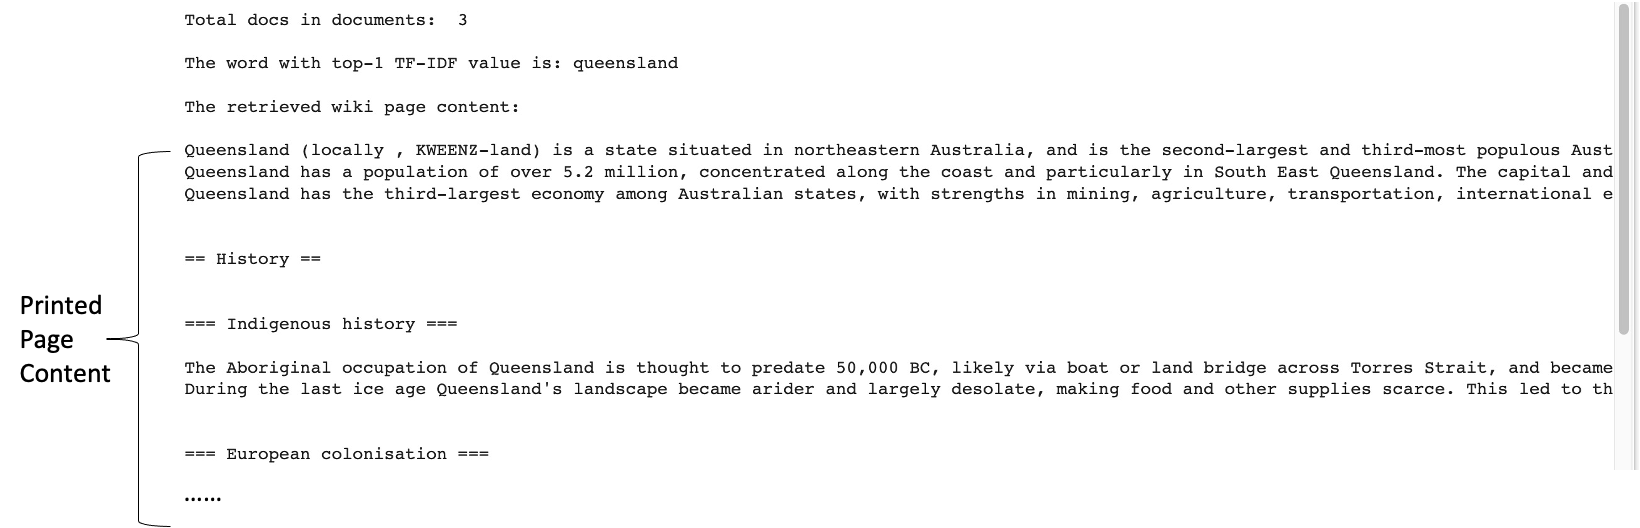